In [43]:
from pylab import mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv("./breast cancer.csv")
dataset
X=dataset.iloc[:,[2,3,4,6,8,10,11,12,13,14]].values
y = dataset.iloc[:,1].values

In [46]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Kernel SVM


In [49]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0 )
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [50]:
y_pred = classifier.predict(X_test)


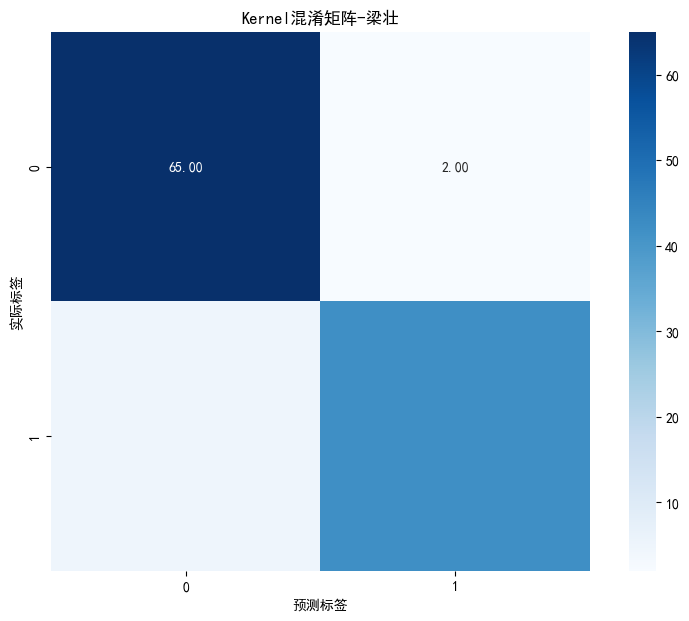

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Kernel混淆矩阵-梁壮')
plt.ylabel('实际标签')
plt.xlabel('预测标签')
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("准确度:", precision)
print("找回:", recall)
print("F1-score:", f1score)

print("\nKernel分类模型性能指标 Report-梁壮:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
准确度: 0.9392800182273867
找回: 0.9385964912280702
F1-score: 0.9382566466700158

Kernel分类模型性能指标 Report-梁壮:
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        67
           M       0.95      0.89      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Liner SVM


In [ ]:
 X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

In [55]:
classifier_2 =SVC(kernel='rbf', random_state=0 )
classifier_2.fit(X_train_2, y_train_2)

SVC(random_state=0)

In [56]:
y_pred_2 = classifier_2.predict(X_test_2)

In [57]:
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
cm_2

array([[88,  2],
       [ 4, 49]], dtype=int64)

Accuracy: 0.958041958041958
准确度: 0.958101574469861
召回值: 0.958041958041958
F1-score: 0.9578690540229003

liner分类模型性能指标 Report-梁壮:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        90
           M       0.96      0.92      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



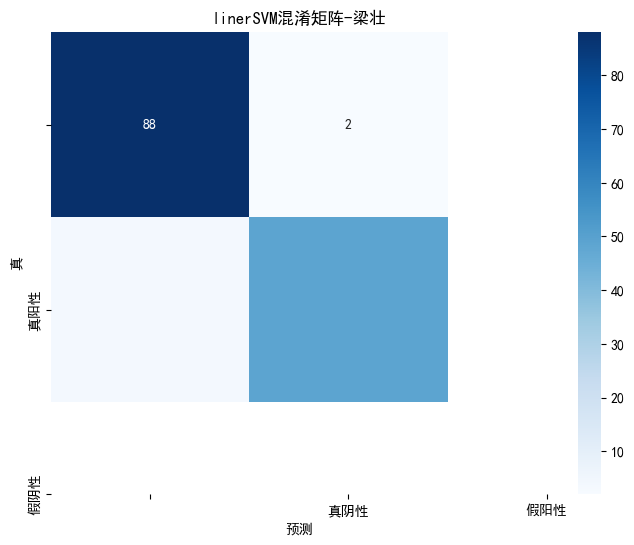

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

#plt.rcParams['font.family'] = 'YaHei Consolas Hybrid' # 设置字体样式
#plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

cm_2 = confusion_matrix(y_test_2, y_pred_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy_2)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test_2, y_pred_2, average='weighted')

print("准确度:", precision)
print("召回值:", recall)
print("F1-score:", f1score)

print("\nliner分类模型性能指标 Report-梁壮:")
print(classification_report(y_test_2, y_pred_2))

# 创建一个热力图来可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap='Blues', xticklabels=['', '真阴性', '假阳性'], yticklabels=['', '真阳性', '假阴性'])
plt.xlabel('预测')
plt.ylabel('真')
plt.title('linerSVM混淆矩阵-梁壮')
plt.show()


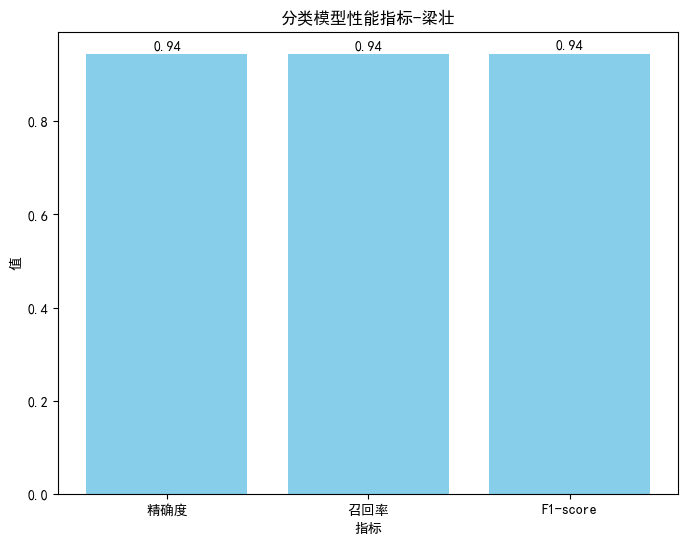

In [59]:
import matplotlib.pyplot as plt


# 定义类别和性能指标数值
categories = ['精确度', '召回率', 'F1-score']
values = [0.9440559440559441, 0.9440559440559441, 0.9442596521248207]

# 创建竖直条形图
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')

# 添加标题和标签
plt.title('分类模型性能指标-梁壮')
plt.xlabel('指标')
plt.ylabel('值')

# 显示数值标签
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

# 显示图形
plt.show()